# TCC Aplicação de Técnicas de Aprendizado de Máquina e Decisões Orientadas a Dados no Setor Eólico Brasileiro

## Disclaimer

**Trabalho de conclusão de curso (TCC)** apresentado para obtenção do título de Bacharel em Engenharia de Energia pela Universidade Estadual Paulista "Júlio de Mesquita Filho" (UNESP)

**OBS**: Esse projeto é descrito de forma didática e apresentável de forma a atingir qualquer tipo de público :D

## Contatos

**Autor**: Matheus Pussaignolli de Paula

**Email para contato**: matheus.paula@unesp.br

**CV Lattes**: http://lattes.cnpq.br/0286473974576150 

**Linkedin**: https://www.linkedin.com/in/matheus-pussaignolli-de-paula

**Blog**: https://dataml.com.br/author/matheus-de-paula/ 

**Orientador**: Wallace Correa de Oliveira Casaca && Marilaine Colnago

# Sumário

•	Sobre o Projeto e Base de Dados

•	Importando Bibliotecas

•	Carregamento do Dataframe e Preparação dos Dados

•	Estatística e Análise Exploratória de Dados

    • Estatística Descritiva
    • Mapa de Calor (Correlação de Pearson)
    • Pairplot (KDE)
    • Gráfico de Dispersão
    • Histograma
	• Boxplot’s
    • Line Plot
	• Violin Plot Mensal 
    
• Pré Processamento dos Dados

    • Engenharia de Seleção de Recursos
    • Divisão da Base de Dados em Treinamento e Teste
    • MissForest
    • Remoção de Colinearidade

• Modelos Preditivos (Machine Learning)

• Baseline Utilizado

    • Random Forest Regressor (RF)
    • Gradient Boosting Regressor (GB)
    • Extreme Gradient Boosting Regressor (XGBoosting)
    • Support Vector Machines (SVM)
    • Rede Neural Multi Layer Perceptron (MLP)
        • Normalização para RNA
   
• Comparação dos Modelos (Performance)

• Tuning do Melhor Modelo

    • Random Search 
    • Grid Search
    
• Conclusão
    
   

# Sobre o Projeto e Base de Dados

Atualmente, a geração eólica é uma das formas de geração de energia elétrica de maior ascensão no mundo. Segundo a Global Wind Report , no ano de 2019, foi registrado um crescimento da potência instalada dessa forma de geração de 221,7% nos últimos 10 anos, passando de 46 gigawatts (GW) para 148 gigawatts GW no mundo. No ranking mencionado, o Brasil mantém a posição de 4º lugar dentre os países que mais implementaram parques eólicos nas América do Norte, Central, do Sul e Caribe, sendo assim, um dos países que mais investem nessa fonte renovável de energia.

Ao contrário de outras fontes de energia como o petróleo e, até mesmo, a geração hídrica, o vento origina-se continuamente do ar em circulação e, em razão disso, pode ser considerado uma fonte “inesgotável” de energia. Deste modo, os efeitos da instalação de uma usina de energia eólica, por exemplo, não afetam de forma drástica a fauna e a flora das regiões locais, o que faz com que haja a geração de energia de forma limpa. Ademais, em adição às vantagens promovidas ao meio ambiente, a energia eólica é também econômica. Os custos de instalação e manutenção desse tipo de geração energética vem diminuindo ao longo dos anos, principalmente, devido ao surgimento de novas tecnologias no processo de produção, bem como no custo associado de seus maquinários de operação, diminuiu assim o custo como um todo.

Em contrapartida, a energia elétrica gerada por cada parque ou conjunto eólico, pode vir a sofrer altas variações, em suma, devido ao fato do vento não apresentar um comportamento regular ao longo do tempo, o que faz com que as provedoras de energia possuam intensa dificuldade em dimensionar qual será a produção exata em meio à demanda energética de cada local consumidor. Outro fator intrigante nesse sentido diz respeito ao modelo das turbinas utilizadas pelos parques eólicos, que podem possuir aerogeradores com velocidade variáveis, dificultando, desta forma, a geração de energia elétrica de forma constante.

Com isso, esse projeto visa investigar o problema de predição de potência elétrica em um parque eólico situado na região nordestina do Brasil, promovendo assim um estudo de previsibilidade da geração eólica da localidade a partir de um pipeline completo de Aprendizado de Máquina para essa finalidade com o objetivo de investigar e ver se é possível realizar a previsão de despacho de um parque com uma alta assertividade.

A base de dados utilizada foi construída utilizando os dados disponibilizados pelo Operador Nacional do Sistema (ONS) que é o principal órgão responsável pela coordenação e controle das instalações de geração e transmissão de energia elétrica no Sistema Interligado Nacional (SIN) e pelo planejamento da operação dos sistemas isolados do país, sob a fiscalização e regulação da Agência Nacional de Energia Elétrica Aneel juntamente a dados fornecidos pelo Instituto Nacional de Metereologia (INMET) o qual tem a missão de monitorar as atividades meteorológicas no país.

Assim, a base de dados foi criada a partir da junção de dados dos dois repositórios supracitados (do período de 2016 até 2020) que possuem informações referentes às seguintes características do Parque Eólico de Praia Formosa no Ceará: 

• Data da Coleta (dia-a-dia)

• Temperatura Média Diária (ºC) 

• Umidade Relativa Média Diária (%) 

• Velocidade Média Diária do Vento (m/s) 

• Precipitação Média Diária (mm)

• Pressão Média Diária (mbar)

• Potência Elétrica Média (MWmed) gerada pelo parque eólico

Abaixo está retratada de forma ilustrativa uma foto de turbinas eólicas upwind de três pás em funcionamento.

<img src="wind.png">

# Importando Bibliotecas

In [1]:
## MANIPULAÇÃO DOS DADOS
import pandas as pd

## MISSING VALUES
import missingno as msno
from missingpy import MissForest

## ÁLGEBRA LINEAR
import numpy as np

## DATAS
from datetime import datetime

## PLOTS
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import lines
%matplotlib inline
from matplotlib import ticker
from matplotlib.pylab import rcParams
from scipy.stats import norm

## ONE HOT
from sklearn.preprocessing import OneHotEncoder 

## MULTICOLINEARIDADE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

## DIVISÃO DO DATASET E VALIDAÇÃO CRUZADA
from sklearn.model_selection import train_test_split, cross_val_score

## MODELOS PREDITIVOS
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

## MÉTRICAS DE AVALIAÇÃO
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error

## TUNING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## SALVAR O MELHOR MODELO
import pickle

## RETIRAR MENSAGEMS DE WARNING
import warnings
warnings.filterwarnings('ignore')

C:\Users\mat-p\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Carregamento do Dataframe e Preparação dos Dados

In [2]:
## LENDO O DATASET E SEPARANDO POR COLUNAS
df = pd.read_csv('Dataset_Parque_Eolico_Praia_Formosa_CE.csv', sep=';')

In [3]:
## INFORMAÇÕES SOBRE AS FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               1827 non-null   object 
 1   Temperatura        1818 non-null   float64
 2   Umidade            1647 non-null   float64
 3   VelocidadedoVento  1827 non-null   float64
 4   Precipitacao       1366 non-null   float64
 5   Pressao            1807 non-null   object 
 6   Geracao            1827 non-null   object 
dtypes: float64(4), object(3)
memory usage: 100.0+ KB


As variáveis de Pressão e Geração vieram como tipo object devido ao Python não reconhecer a ',' e sim o '.' no sistema americano. Assim, iremos realizar um loop para mudar a ',' por '.'

In [4]:
## MUDANDO VIRGULAS DA GERAÇÃO E PRESSÃO POR PONTO PARA SER POSSÍVEL A ANÁLISE (CONVERSÃO DE OBJECT PARA FLOAT)
df["Geracao"] = [str(x).replace(",", ".") for x in df["Geracao"]]
df["Geracao"] = df["Geracao"].astype(float)

df["Pressao"] = [str(x).replace(",", ".") for x in df["Pressao"]]
df["Pressao"] = df["Pressao"].astype(float)

In [5]:
## CABEÇALHO INICIO
df.head()

,Data,Temperatura,Umidade,VelocidadedoVento,Precipitacao,Pressao,Geracao
0,01/01/2016,28.86,63.50,1.16,0.0,1000.34,16.317583
1,02/01/2016,29.58,60.75,1.50,0.0,1000.30,29.661333
2,03/01/2016,29.26,74.75,1.56,0.0,1000.19,33.105792
3,04/01/2016,29.20,64.00,2.66,0.0,1000.19,29.738250
4,05/01/2016,29.02,63.75,1.83,0.0,1000.89,29.993500


In [6]:
## FINAL DO CABEÇALHO
df.tail()

,Data,Temperatura,Umidade,VelocidadedoVento,Precipitacao,Pressao,Geracao
1822,27/12/2020,29.10,57.96,2.45,1.0,998.34,57.429625
1823,28/12/2020,29.53,55.50,2.05,0.0,998.81,43.551083
1824,29/12/2020,29.33,55.71,1.37,0.0,997.98,49.767792
1825,30/12/2020,28.58,63.46,0.90,0.0,997.99,34.685708
1826,31/12/2020,29.13,61.92,0.68,0.6,999.18,32.296667


In [7]:
## COPIANDO DF ORIGINAL
df_copy = df.copy()

In [8]:
## RENAME
df.rename(columns={'Umidade':'Umidade Relativa','VelocidadedoVento':'Velocidade do Vento', 
                   'Precipitacao':'Precipitação','Pressao':'Pressão','Geracao':'Potência Elétrica'},inplace=True)

## Missing Values

O tratamento de missing é uma etapa de extrema importância, pois a partir da mesma é possível utilizar distintas estratégias para que possamos aproveitar da melhor maneira os dados que temos disponíveis.

Normalmente em diversos datasets é muito comum ocorrer erro na coleta dos dados ou armazenamento dos mesmos, assim é possível a utilização de medidas de tendência central (média, moda, mediana), a exclusão da feature (caso haja muitos valores faltantes presentes) ou a utilização de técnicas de machine learning para o preenchimento.

Data                    0.00
Temperatura             0.49
Umidade                 9.85
Velocidade do Vento     0.00
Precipitação           25.23
Pressão                 1.09
Potência Elétrica       0.00
dtype: float64

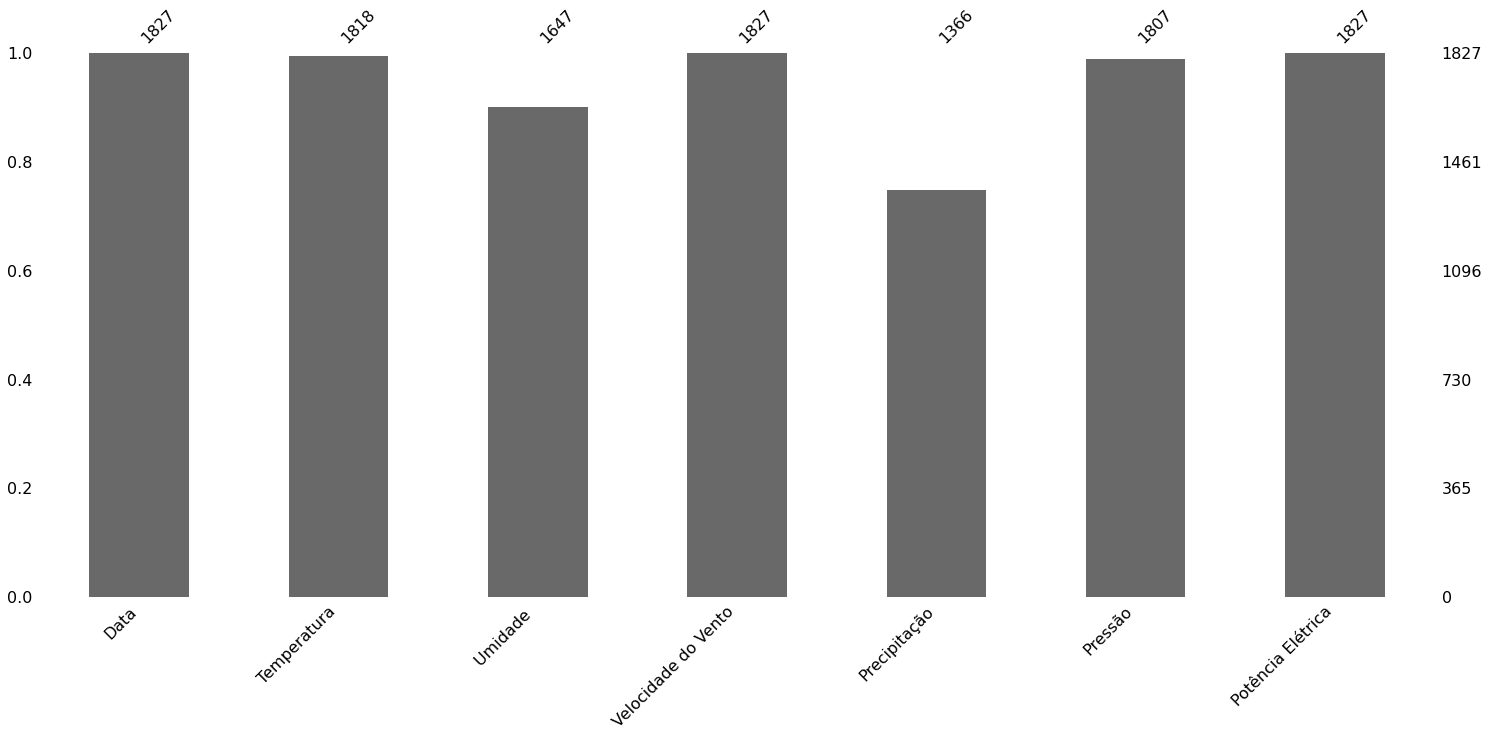

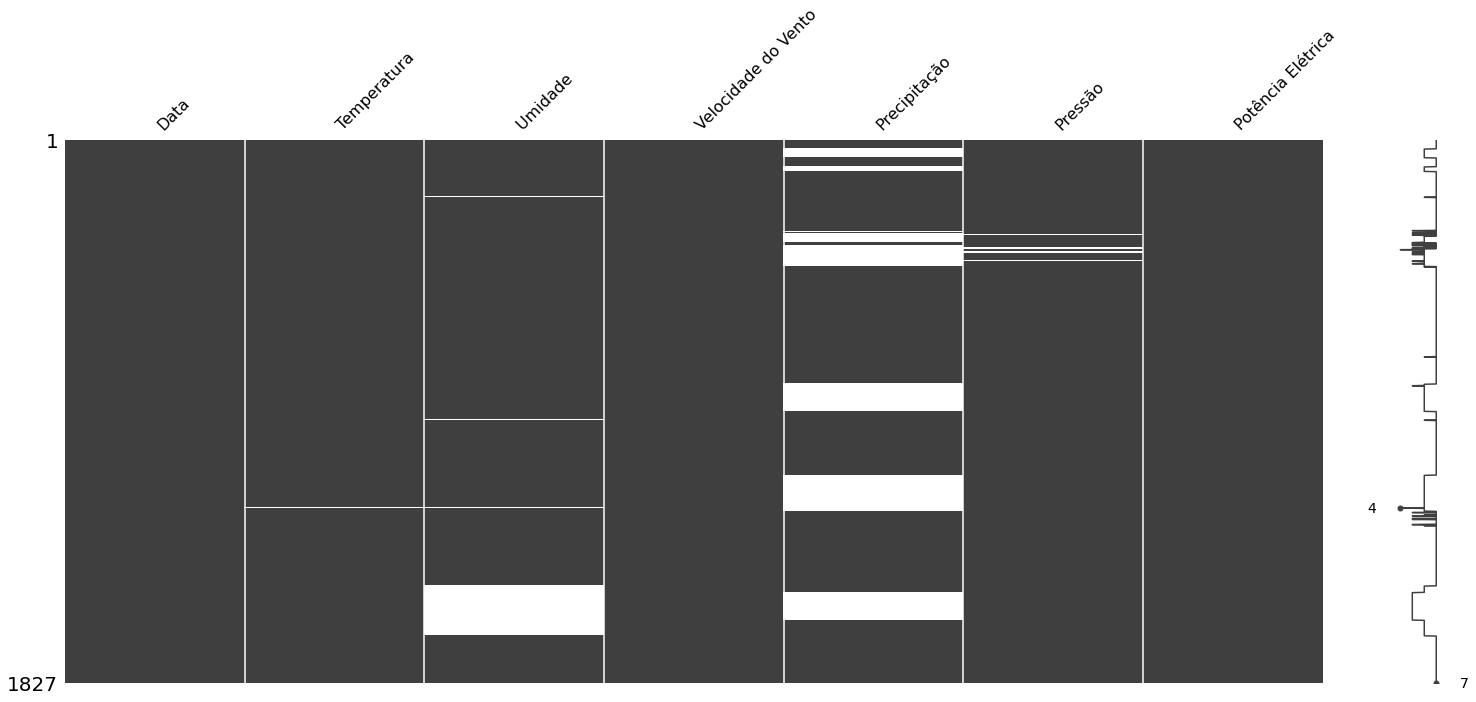

In [9]:
## OBSERVANDO DADOS NAN NO DATASET
barmissing = msno.bar(df)
matrizmissing =msno.matrix(df)

#plt.savefig("matrizmissing.png", dpi = 300, bbox_inches='tight')

## PERCENTUAL DE DADOS FALTANTES
round(df.isna().mean()*100,2)

De acordo com as figuras e com o percentual de dados faltantes observado, podemos observar que a variável com um maior número de missing values é a precipitação (que dentro de nosso contexto não é uma variável tão relevante).

Em um primeiro momento iremos manter todas as features do dataset e tendo em vista que os valores faltantes não são muitos <10% (exceto a precipitação) realizaremos o preenchimento dos dados faltantes usando a biblioteca Miss Forest (após o split antes de testar os modelos para evitar Data Leakage), essa etapa será realizada mais adiante antes de testar os modelos.

Vale ressaltar que outros metodos poderiam ser utilizados principalmente quando temos poucos dados faltantes no dataset (<10%), tais como as medidas de tendência central (média, moda, mediana) ou até mesmo o valor mais frequente.  


# Estatística e KDD (Knowledge Discovery in Databases)

A etapa KDD (Knowledge Discovery in Databases), compreende todas as etapas para a descoberta do conhecimento a partir da existência de dados. Para a descoberta de conhecimento, é preciso realizar diversas observações e etapas para que assim a base de dados “bruta”, seja convertida em conhecimento, trazendo melhores insights para a etapa de Machine Learning.

<img src="kdd.png">

## Estatística Descritiva

Avaliando os dados utilizando medidas de tendência central (média, mediana e moda), medidas de dispersão (valores mínimo e máximo, desvio padrão e variância), percentis, quartis e medidas de distribuição (achatamento e simetria da curva de distribuição).

In [10]:
## DELETANDO A DATA PARA EXPLORATÓRIA
df.drop(columns=['Data'])

,Temperatura,Umidade,Velocidade do Vento,Precipitação,Pressão,Potência Elétrica
0,28.86,63.50,1.16,0.0,1000.34,16.317583
1,29.58,60.75,1.50,0.0,1000.30,29.661333
2,29.26,74.75,1.56,0.0,1000.19,33.105792
3,29.20,64.00,2.66,0.0,1000.19,29.738250
4,29.02,63.75,1.83,0.0,1000.89,29.993500
...,...,...,...,...,...,...
1822,29.10,57.96,2.45,1.0,998.34,57.429625
1823,29.53,55.50,2.05,0.0,998.81,43.551083
1824,29.33,55.71,1.37,0.0,997.98,49.767792
1825,28.58,63.46,0.90,0.0,997.99,34.685708


In [11]:
## ESTATÍSTICAS DESCRITIVAS
df.describe()

,Temperatura,Umidade,Velocidade do Vento,Precipitação,Pressão,Potência Elétrica
count,1818.000000,1647.000000,1827.000000,1366.000000,1807.000000,1827.000000
mean,27.376705,70.278494,1.110392,1.106735,1000.942352,23.522291
std,1.298846,13.100119,0.947319,4.317753,1.574271,15.782134
min,23.420000,24.000000,0.000000,0.000000,996.370000,0.000000
25%,26.360000,59.750000,0.530000,0.000000,999.850000,8.827958
50%,27.380000,68.000000,1.000000,0.000000,1000.850000,22.716958
75%,28.477500,81.500000,1.540000,0.000000,1002.020000,36.950583
max,32.880000,97.750000,25.700000,41.000000,1006.190000,68.981000


## Mapa de Calor (Correlação de Pearson)

A determinação do grau de relação entre duas variáveis é dada pelo coeficiente de Pearson, também chamado de coeficiente de correlação, ou simplesmente correlação para os pares de variáveis. Este coeficiente, normalmente representado por ρ, assume apenas valores entre -1 e 1, que expressa o grau de dependência linear entre duas variáveis quantitativas.

Faixa de Valores de Correlação:

•(+/-) 0,9 correlação muito forte.

•(+/-) 0,7 a 0,9 correlação forte.

•(+/-) 0,5 a 0,7 correlação moderada.

•(+/-) 0.3 a 0,5 correlação fraca.

•(+/-) 0 a 0,3 correlação desprezível.

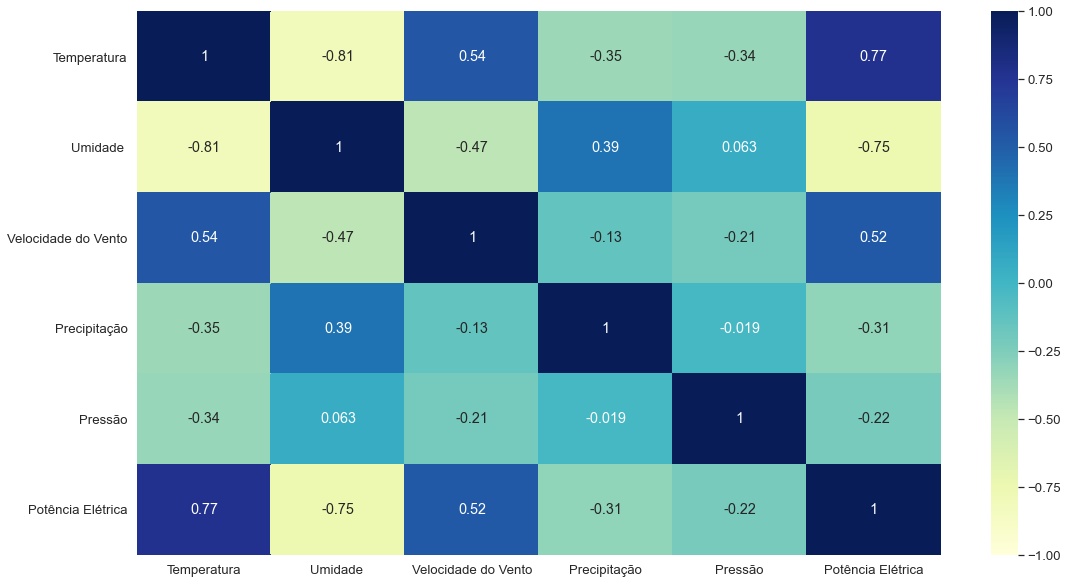

In [12]:
rcParams['figure.figsize'] = 18, 10
sns.set(font_scale=1.2)

matriz_de_correlacao = df.corr()

sns.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0, cmap="YlGnBu")

plt.autoscale()
plt.yticks(rotation=360)
plt.xticks(rotation=360)

#plt.savefig("Correlacao.png", dpi = 300, bbox_inches='tight')

plt.show()  

A partir do observado no mapa de calor, é possível observar que ocorrem algumas correlações entre as variáveis previsoras em relação a target (Potência Elétrica), fica evidente observar que: 

• A temperatura e a umidade relativa do ar possuem uma correlação considerada forte sendo a faixa de valores podendo assim serem variáveis importantes para a previsão da geração de potência (lembrando sempre do conceito que correlação não indica a causalidade).

• A velocidade do vento possuiu uma correlação moderada em relação a potência elétrica (isso ocorreu pois nesse trabalho estamos considerando a média diária de cada feature e não avaliando por horário).

• A precipitação possui uma correlação considerada fraca com a potência elétrica, isso pode ocorrer devido as massas de vento serem mais presentes em dias ensolarados principalmente na região de Sobral (onde se situa o parque eólico).

• A pressão acaba não possuindo uma correlação com a potência devido a sua pouca variabilidade ao decorrer dos dias (já que estamos considerando a média) porém é importante ressaltar que ela é extremamente importante para se considerar em nosso modelo tendo em vista que ela é a feature responsável pela ocorrência dos ventos.


## Pairplot (KDE)

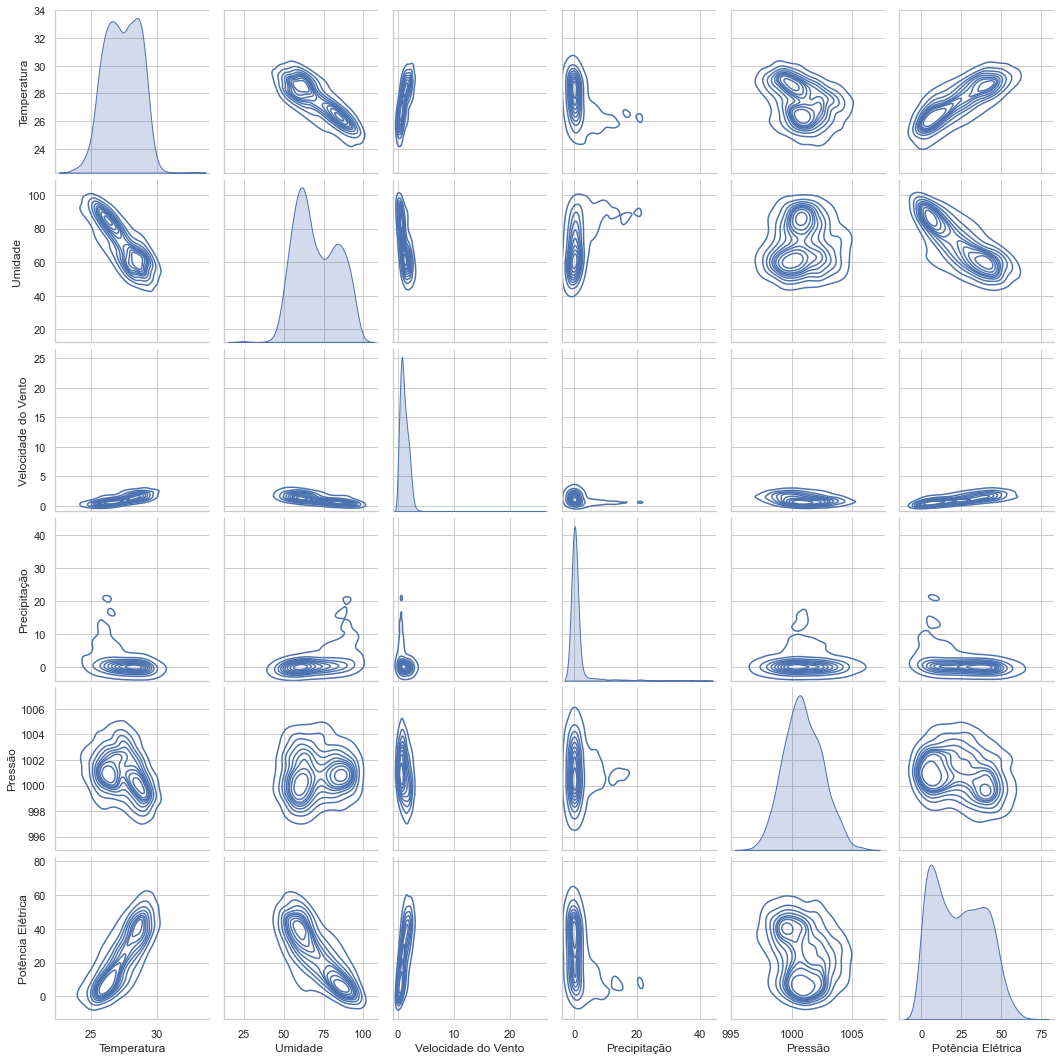

In [13]:
## PAIRPLOT PARA VER AS RELAÇÕES ENTRE TODAS AS FEATURES (KDE)
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")

rcParams['figure.figsize'] = 15, 7

sns.pairplot(df, kind='kde')

#plt.savefig("PairPlotCE.png", dpi = 300, bbox_inches='tight')

## Gráfico de Dispersão 

O gráfico de dispersão é uma forma de visualização que permite observar o grau de dependência entre duas variáveis quantitativas, permitindo observar se ocorre ou não linearidade entre as variáveis.

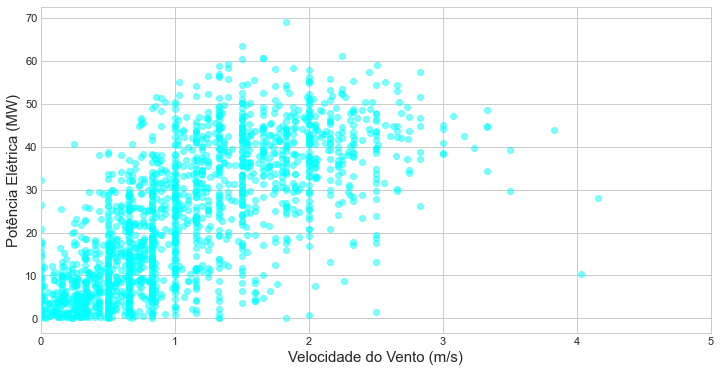

In [14]:
## OBSERVANDO A RELAÇÂO DA VELOCIDADE DO VENTO COM A POTÊNCIA ELÉTRICA
plt.style.use('seaborn-whitegrid')

rcParams['figure.figsize'] = 12, 6
scatter_plot = plt.scatter(df['Velocidade do Vento'], df['Potência Elétrica'], alpha=0.5, color='cyan')

plt.xlabel("Velocidade do Vento (m/s)", fontsize = 15)
plt.ylabel("Potência Elétrica (MW)", fontsize = 15)

plt.xlim((0,5))

#plt.savefig("Scatter.png", dpi = 300, bbox_inches='tight')

plt.show()

Analisando o Comportamento do Gráfico de Dispersão, podemos afimar que:

• Nesse caso em específico, não houve uma grande correlação da velocidade do vento com a potência elétrica gerada pelo parque devido aos dados metereológicos serem da região de Sobral (CE). 

• O Parque Eólico fica situado em Sobral (CE), porém a estação metereológica não fica tão próxima ao parque podendo assim ocorrer algumas variações e discrepâncias na comparação entre os dos dados.

• Vale ressaltar que é importante levar em conta que algumas Turbinas Eólicas possuem limite de Geração de Potência, isto é, em determinadas velocidades de vento sejam elas maiores ou menores que o estipuladas pelo motor de indução pode acontecer de não ocorrer a geração de potência.

## Histograma 

O histograma retrata a distribuição de frequências, sendo representado graficamente em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. Sendo assim, este mostra graficamente como cada categoria (intervalo) é responsável pela proporção do total de observações e sua apropriação.

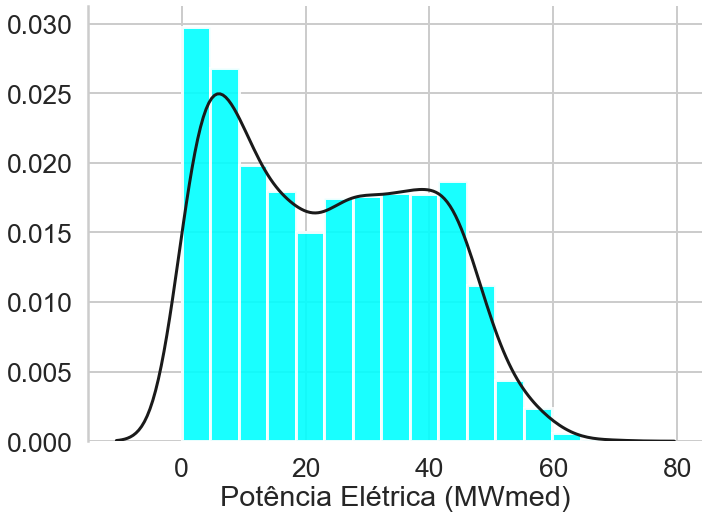

In [15]:
## EXAMINANDO A DISTRIBUIÇÃO DA GERAÇÃO AO LONGO DO TEMPO (HISTOGRAMA + ESTIMATIVA DA DENSIDADE DE KERNEL)
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=1.2)

fig, axes = plt.subplots(figsize=(11, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

sns.distplot(df['Potência Elétrica'], kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"linewidth": 3,"alpha": 0.9, "color": "cyan"});

axes.set(ylabel="", xlabel="Potência Elétrica (MWmed)")

sns.despine(left=False, bottom=True)

plt.savefig("Distribuicao_Target.png", dpi = 300, bbox_inches='tight')

plt.show()

No caso do histograma, é possível observar que a variável target (Potência Elétrica Gerada) não possui uma assimetria tão definida. 

No caso, é vísivel observar que os outliers se situam mais a direita por isso podemos afirmar que a inclinação da estimativa de kernel está situada mais a esquerda, sendo assim temos que:

• Média da Geração (23,522291 MWmed) > Mediana da Geração (22,716958 MWmed)

## Boxplot's 

O boxplot (ou diagrama de caixa) é  uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis, assim a partir dela é possível observar a distribuição dos dados além de seus resíduos (outliers).

<img src="boxplot.png">

In [16]:
## POR AQUI VOU UTILIZAR A COPIA DO DF PARA ALGUMAS ANÁLISES ENVOLVENDO MESES, DIAS E ANOS.

# TRANSFORMANDO A COLUNA DE OBJECT PARA DATETIME
df_copy['Data'] = pd.to_datetime(df_copy['Data'])

# MÊS 0, 1, 2 -> PARA JANUARY, FEBRUARY, MARCH ...
df_copy['Meses'] = df_copy["Data"].dt.strftime("%B")

## DIAS DA SEMANA -> MONDAY, TUESDAY, WEDNESDAY ...
df_copy['Dias'] = df_copy["Data"].dt.strftime("%A")

## ANOS
df_copy['Anos'] = df_copy["Data"].dt.strftime("%Y")

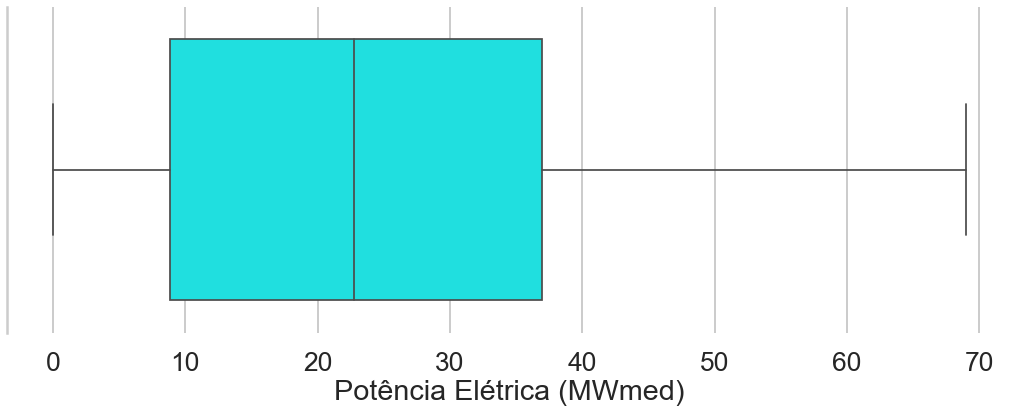

In [17]:
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=1.2)

fig, axes = plt.subplots(figsize=(18, 6))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

#plt.title("Boxplot - Potência Elétrica (MWmed)", fontsize=20)

ax1 = sns.boxplot(x='Geracao', color='cyan', data=df_copy)

axes.set(xlabel="Potência Elétrica (MWmed)")
sns.despine(left=False, bottom=True)

#plt.savefig("Potencia_Eletrica_Boxplot.png", dpi = 300, bbox_inches='tight')

É observada que a variação da potência elétrica tem valores mais comuns sempre entre 20MWmed e 30MWmed (gerados por dia) perante ao parque. 

Além disso, fica claro a não presença de valores discrepantes ao longo da série.

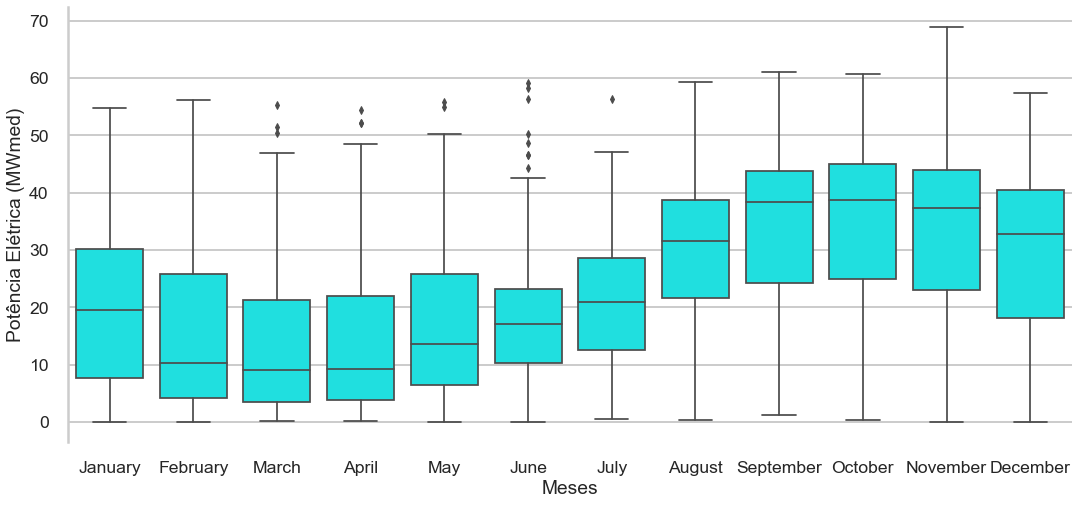

In [18]:
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=0.8)

fig, axes = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

ax = sns.boxplot(x="Meses", y="Geracao", data=df_copy, color='cyan')

## DEFININDO LABELS
axes.set(ylabel="Potência Elétrica (MWmed)", xlabel="Meses")
sns.despine(left=False, bottom=True)

#plt.savefig("Boxplot_por_mes.png", dpi = 300, bbox_inches='tight')

A partir dos boxplots por mês é possível observar que os meses que temos mais outliers (valores que fogem do padrão) se situam em Junho, justamente no período onde começa a mudar a tendência da série e começa o período de Safra dos Ventos no nordeste brasileiro.

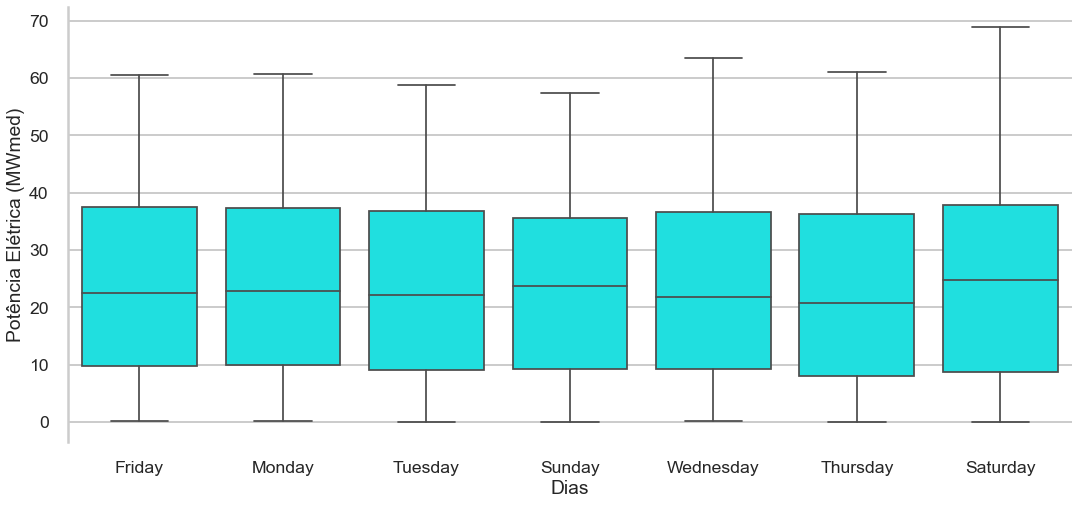

In [19]:
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=0.8)

fig, axes = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

ax = sns.boxplot(x="Dias", y="Geracao", data=df_copy, color='cyan')

## DEFININDO LABELS
axes.set(ylabel="Potência Elétrica (MWmed)", xlabel="Dias")
sns.despine(left=False, bottom=True)

#plt.savefig("Potencia_Eletrica_Dia.png", dpi = 300, bbox_inches='tight')

Fica claro que ao longo dos dias da semana a potência elétrica acaba não tendo muita variação (vide mediana) observada sempre entre 20 MWmed e 30MWmed.

## Line Plot 

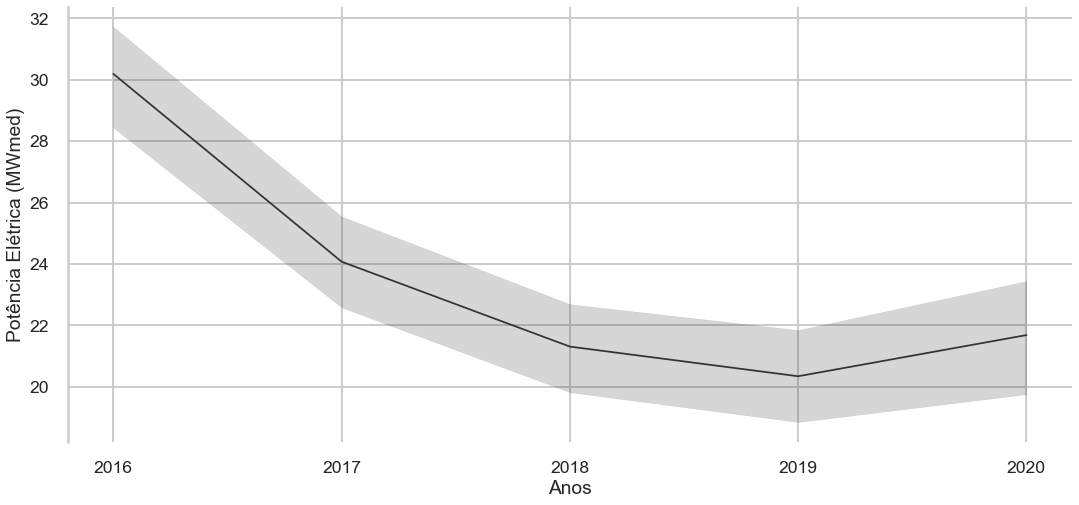

In [20]:
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=0.8)

fig, axes = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

ax = sns.lineplot(x="Anos", y="Geracao", data=df_copy, color='.2')

## DEFININDO LABELS
axes.set(ylabel="Potência Elétrica (MWmed)", xlabel="Anos")
sns.despine(left=False, bottom=True)

#plt.savefig("Potencia_Eletrica_Anos.png", dpi = 300, bbox_inches='tight')

É evidente observar que ocorreu uma maior geração de potência elétrica no ano de 2016 e que a mesma foi decaindo ao decorrer dos anos (vide mediana), entretanto é evidente observar a alta variabilidade que a mesma acabou possuindo (vide valores máximos e mínimos).

Assim, é valido ressaltar a importância que iremos ter em treinar os modelos com os dados de forma aleatória de forma a obter melhores scores tendo em vista essa "tendência" da queda de geração ao longo dos anos.

## Violin Plot Mensal

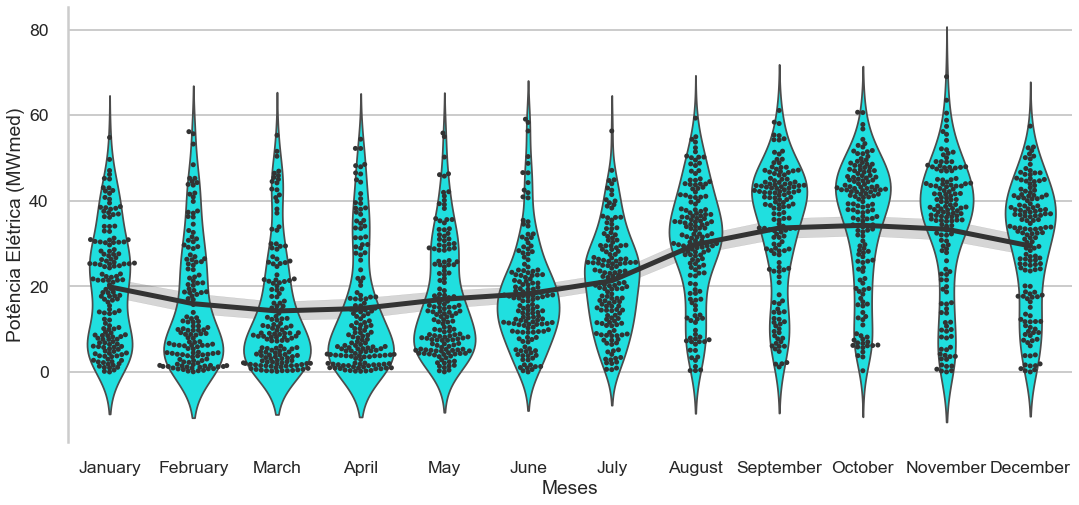

In [21]:
formatter = ticker.ScalarFormatter(useMathText=True)
plt.style.use('seaborn-notebook')
sns.set(style="whitegrid")
sns.set_context('poster',font_scale=0.8)

fig, axes = plt.subplots(figsize=(18, 8))
plt.style.use('seaborn-notebook')
sns.set_color_codes("pastel")

sns.swarmplot(x="Meses", y="Geracao", data=df_copy,color=".2")

sns.lineplot(x="Meses", y="Geracao", data=df_copy,lw=5,palette='magma',sort=False,color=".2")

sns.violinplot(x="Meses", y="Geracao", data=df_copy, inner=None, color="cyan")

axes.set(ylabel="Potência Elétrica (MWmed)", xlabel="Meses")
sns.despine(left=False, bottom=True)

#plt.savefig("Media_Distribuicao_Mensal.png", dpi = 300, bbox_inches='tight')

 A partir do observado na distribuição, fica evidente observar que ocorrem maiores valores de geração de potência no Parque ao decorrer dos últimos meses dos anos (Setembro, Outubro e Novembro), isso se deve ao fato de no nordeste durante esse período ocorrer a chamada epóca de "Safra dos Ventos" onde acaba ocorrendo uma maior geração de potência ao decorrer desses períodos devido as maiores intensidades de vento ao longo desse semestre do ano.

# Pré Processamento dos Dados

## Engenharia de Seleção de Recursos e Limpeza
 
A Engenharia de recursos significa criar recursos adicionais a partir dos dados existentes, que geralmente são espalhados por várias tabelas relacionadas. A engenharia de recursos exige extrair as informações relevantes dos dados e colocá-las em uma única tabela que pode ser usada para treinar um modelo de aprendizado de máquina.

Para a criação de algumas das features foi utilizado como base o seguinte artigo: *Towards Assessing the Electricity Demand in Brazil: Data-Driven Analysis and Ensemble Learning Models* [1]

Um breve descritivo de cada feature criada:

• Médias Móveis Semanal e Trimestral: com o objetivo de acompanhar a tendência da série.

• Log Return: A transformação da variável em uma métrica comparavel como a porcentagem permite com que possamos realizar análises estatísticas muldimensionais.

• Subtração: para seguir a sazonalidade da série.

• Feature ciclica (Dias): já que na AED foi observado que a geração não varia muito ao longo dos dias da semana a feature ciclica permite com que encontremos as tendências que podemos possuir ao longo das semanas.

• One-Hot (Meses): como observado na análise exploratória dos dados ao longo dos meses do ano o Parque Eólico de Praia Formosa acaba gerando mais potência elétrica durante os segundos semestres dos anos. Em sintese, a partir de uma variável categórica criamos um vetor de features binárias onde cada feature representa o pertencimento ou não da instância à uma categoria, nesse caso os meses do ano.

In [22]:
## Média Movel Semanal
df['MM Semanal'] = df['Potência Elétrica'].rolling(window=7).mean()

## Média Móvel Trimestral
df['MM Trimestral'] = df['Potência Elétrica'].rolling(window=90).mean()

## Log return da Variável Target
df['Log Return'] = np.log(df['Potência Elétrica']/df['Potência Elétrica'].shift(1))

## Subtração (2 amostras)
df['Subtração'] = (df['Potência Elétrica'] - df['Potência Elétrica'].shift(1))

## Feature ciclica dos dias
ciclico_dias = df_copy['Data'].dt.day
df['Dia Seno'] = np.sin(ciclico_dias*(2*np.pi/365))

In [23]:
## ALOCANDO MESES EM UM DF (JÁ QUE MANTIVE O DATASET ORIGINAL EM DF_COPY)
df_alvo = df_copy[['Meses']]

## ONE HOT 
onehot = OneHotEncoder()
df_hot = pd.DataFrame((onehot.fit_transform(df_alvo)).toarray())

## JUNTANDO COM O DATASET
df_complete = df.join(df_hot)

df_complete

,Data,Temperatura,Umidade,Velocidade do Vento,Precipitação,Pressão,Potência Elétrica,MM Semanal,MM Trimestral,Log Return,...,2,3,4,5,6,7,8,9,10,11
0,01/01/2016,28.86,63.50,1.16,0.0,1000.34,16.317583,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,02/01/2016,29.58,60.75,1.50,0.0,1000.30,29.661333,NaN,NaN,0.597601,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03/01/2016,29.26,74.75,1.56,0.0,1000.19,33.105792,NaN,NaN,0.109864,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,04/01/2016,29.20,64.00,2.66,0.0,1000.19,29.738250,NaN,NaN,-0.107274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,05/01/2016,29.02,63.75,1.83,0.0,1000.89,29.993500,NaN,NaN,0.008547,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,27/12/2020,29.10,57.96,2.45,1.0,998.34,57.429625,44.699821,42.701860,0.208087,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,28/12/2020,29.53,55.50,2.05,0.0,998.81,43.551083,44.512500,42.719018,-0.276626,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1824,29/12/2020,29.33,55.71,1.37,0.0,997.98,49.767792,46.365286,42.784162,0.133433,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,30/12/2020,28.58,63.46,0.90,0.0,997.99,34.685708,46.116744,42.747027,-0.361040,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
## OBSERVANDO SE OCORRERAM DADOS FALTANTES DA ETAPA DE FEATURE ENGINEERING
round(df_complete.isna().mean()*100,2)

Data                    0.00
Temperatura             0.49
Umidade                 9.85
Velocidade do Vento     0.00
Precipitação           25.23
Pressão                 1.09
Potência Elétrica       0.00
MM Semanal              0.33
MM Trimestral           4.87
Log Return              0.05
Subtração               0.05
Dia Seno                0.00
0                       0.00
1                       0.00
2                       0.00
3                       0.00
4                       0.00
5                       0.00
6                       0.00
7                       0.00
8                       0.00
9                       0.00
10                      0.00
11                      0.00
dtype: float64

Para o preenchimento de tais valores faltantes iremos utilizar o MissForest, assim para que possamos utiliza-lo primeiramente precisamos dividir nossa base de dados em treino/teste para evitar Data Leakage.

## Divisão da Base de Dados em Treinamento e Teste

Em todos os modelos preditivos que serão testados vamos adotar 80% dos dados para treinamento e 20% dos dados para testes de forma aleatória (diminuir overfitting).

In [25]:
## ALOCANDO FEATS PREDITORAS
Previsores = df_complete.drop(columns=['Data','Potência Elétrica'])
# SUBSTITUINDO VALORES INF POR NAN
Previsores = Previsores.replace({np.inf: np.nan, -np.inf: np.nan})

# TARGET
Target = df_complete['Potência Elétrica']

print(Previsores.shape)
print(Target.shape)

(1827, 22)
(1827,)


In [26]:
## DIVISÃO DA BASE DA DADOS (80% PARA TREINAMENTO E 20% PARA TESTES - Hould-Out)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(Previsores, Target, test_size=0.2, random_state=42)

## CONFERINDO O TAMANHO(SHAPE) DAS MATRIZES E DO VETOR TARGET
print('Shape Entrada para Treino:',X_treino.shape)
print('Shape Entrada para Teste:',X_teste.shape)
print('Shape Saida para Treino:',Y_treino.shape)
print('Shape Saida para Teste:',Y_teste.shape)

Shape Entrada para Treino: (1461, 22)
Shape Entrada para Teste: (366, 22)
Shape Saida para Treino: (1461,)
Shape Saida para Teste: (366,)


## Miss Forest

Utilizando o Random Forest (explicado na secção **Baseline Utilizado**) para o preenchimento dos valores faltantes.

In [27]:
## MISS FOREST
imputar = MissForest()

## IMPUTANDO TREINO E TESTE VARIAVEIS PREVISORAS
X_treino = imputar.fit_transform(X_treino)
X_teste = imputar.fit_transform(X_teste)

## VERIFICANDO VALORES FALTANTES APÓS MISSFOREST
print('Valores faltantes no treino:', np.sum(np.isnan(X_treino)))
print('Valores faltantes no teste:', np.sum(np.isnan(X_teste)))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Valores faltantes no treino: 0
Valores faltantes no teste: 0


## Remoção de Colinearidade

A colinearidade, frequentemente chamada de multicolinearidade, é um fenômeno que aumenta quando as características de um conjunto de dados mostram uma alta correlação entre si. Geralmente é medido usando o coeficiente de correlação de Pearson. Se a matriz de correlação mostra elementos fora da diagonal com um valor absoluto alto, podemos falar sobre colinearidade.

A colinearidade é um problema muito grande, porque aumenta a variância do modelo (principalmente para modelos lineares), aumenta o número de dimensões sem aumentar a informação e, além disso, distorce a nossa capacidade de explicar um modelo. Se dois recursos são colineares, eles não devem ser considerados juntos e apenas os recursos mais informativos devem ser considerados.

A detecção de multicolinearidade pode ocorrer também a partir do VIF (Variance Inflation Factor). Esse fator em sintese mede o grau em que cada variável independente é explicada pelas demais variáveis independentes. Quanto maior for o fator de inflação, mais severa será a multicolinearidade.


In [28]:
## DROPANDO VALORES NULOS PARA DESCONSIDERAR A DUMMIE
Previsores = Previsores.dropna()

## VIF VERIFICANDO ENTRE OS PREVISORES
vif = [variance_inflation_factor(Previsores.values,i) for i in range(Previsores.shape[1])]

## CRIANDO O DF QUE FAZ O DICIONÁRIO DOS PREVISORES/VIF
vif_df = pd.DataFrame({'vif':vif[0:]}, index=Previsores.columns)

def highlight_max(s):
    ## SE O VIF FOR MAIOR QUE 10 IDENTIFICA
    is_max = s > 10
    return ['background-color: orange' if v else '' for v in is_max]

vif_df.style.apply(highlight_max)

,vif
Temperatura,4.281790
Umidade,3.496243
Velocidade do Vento,1.359348
Precipitação,1.299298
Pressão,2.009131
MM Semanal,4.050291
MM Trimestral,3.695316
Log Return,1.951805
Subtração,1.967524
Dia Seno,1.060594


Uma regra que é bastante dita na literatura indica que um VIF > 10 indica que a multicolinearidade possa estar influenciando as estimativas de mínimos quadrados. 

Para esse projeto considerando o contexto iremos manter todas as features criadas no projeto tendo em vista que obtemos um vif < 10 em todas. 

Ademais, podemos dizer que para modelos preditivos em problemas relacionados a regressão não-linear a multicolinearidade pode não ser um problema quando queremos observar a capacidade de um modelo de machine learning.

**OBS**:Vale ressaltar que a feature de one-hot dos meses não tera uma influência direta e será utilizada primordialmente para acompanhar a tendência que a série da potência elétrica possuiu (como visto na análise exploratória dos dados)

# Modelos Preditivos (Machine Learning)

Dentro do cenário de predição, metodologias relacionadas ao tema Aprendizado de Máquina (AM) vêm sendo cada vez mais usadas em tomadas de decisões na elaboração de planejamentos estratégicos mais otimizados e seguros de parques eólicos. 

A intuição por trás do AM é realizar a construção de sistemas que, de forma automatizada (ou ainda, semi-automatizada), acabem “adquirindo conhecimento”, isto é, venham a “aprender” a partir dos dados disponíveis e da interação entre eles. Assim, o sistema originado (Modelo de AM) toma as melhores decisões a partir dos dados de entrada, ou ainda, a partir de problemas e experiências já avaliadas anteriormente.

# Baseline Utilizado


## Random Forest

A floresta aleatória (Random Forest), RF, é um método pelo qual realiza-se a previsão a partir de um conjunto de estimadores que induzem as aprendizagens e estratégias, onde as mesmas são feitas com base nas árvores de regressão ou classificação. Essa metodologia tem como princípio utilizar um subconjunto aleatório no decorrer da seleção dos nós. Dessa forma, podemos afirmar que a randomização pode fazer com que seja possível levar em consideração as variáveis que mais influenciam no modelo independente da correlação e, assim, melhorar o desempenho do algoritmo.

De uma forma geral, o método do Random Forest consiste em três etapas:

• Gerar um número X de conjuntos da amostra boostrap (base de treinamento).

• Para cada amostra, gerar uma árvore de regressão (sem ajuste) com a seguinte modificação: em cada nó, deve-se gerar uma amostra aleatória P das variáveis de entrada do dataset de treino, e escolher a melhor divisão das mesmas, onde P < V, sendo V o número de variáveis do dataset.

• Prever a nova saída, a partir do cálculo da média das saídas de M árvores de regressão quando novas variáveis são inseridas no modelo.

## Gradient Boosting

O Aumento de Gradiente cria basicamente uma árvore de regressão simples e, após isso, utiliza uma variação do gradiente descendente para ir otimizando as árvores nas interações a partir de uma função de custo. Assim, a decisão tomada pelo GTB é dada a partir da soma das estimativas da árvore. Dessa forma, podemos afirmar que o princípio básico de funcionamento do algoritmo consiste em três fatores principais:

•	Uma função de custo a ser otimizada (loss function).

•	Modelos preditivos fracos para a previsão (vide Árvores de Decisão).

•	Modelos adicionais de “weak learners” para a minimização da função de custo.

## SVM

As Máquinas de Vetores de Suporte (ou Support Vector Machines – SVMs) são um novo paradigma na área de aprendizado de máquina, sendo conhecido principalmente como aprendizado estatístico. Essa teoria de aprendizado estatístico tem como princípio resolver problemas quando temos uma quantidade de dados disponíveis é reduzida ou nula, encontradas em várias aplicações nos dias atuais. 

Para problemas relacionados a regressão como esse trabalho, podemos utilizar o SVM a partir do uso de uma função de perda a qual é minimizada com um regularizador. Assim, frequentemente os SVMs são chamados de SVR (Support Vector Regression) para a previsão e séries temporais. Dessa forma, adaptando para o contexto do presenta TCC temos o objetivo de encontrar uma função não linear f que minimize ao máximo o erro da previsão quando estamos no processo de treinamento do algoritmo.


## Extreme Gradient Boosting (XGBoosting)


O Aumento Extremo de Gradiente (XGBoosting), XGB, é um algoritmo de aprendizado de máquina baseado em árvores, que tem como objetivo modificar o aumento de gradiente de forma que ele funcione com qualquer função de perda diferenciável. Assim como o modelo Gradient Boosting (GB), no XGBoosting são aplicados os “week learners” usando a estruturação do gradiente descente, porém ele acaba realizando um aprimoramento do GB através da otimização dos sistemas e aprimoramentos dos algoritmos.
Dessa forma, as árvores acabam não possuindo os mesmos pesos em suas configurações, sendo possível diminuir o sobreajuste (overfitting) por parte do modelo. Assim, para o modelo possa alcançar ótimos resultados, temos o objetivo de diminuir ao máximo a loss function do XGB. Em sintese, o seu funcionamento tem como princípio básico os seguintes aspectos:

• Uma função de custo L_t a ser otimizada (loss function).

• Modelos preditivos baseados em árvores de decisão

• Modelos adicionais de “weak learners” para minimizar a função de custo.
	
• Termos de Regularização.


## Rede Neural Multi Layer Perceptron (MLP)

Redes Neurais Artificiais (RNA’s) são metodologias computacionais idealizadas com o intuito de representar um paradigma matemático inspirado em uma estrutura neural inteligente. Realizando uma analogia com a neurologia biológica, podemos comparar o cérebro humano com um sistema computacional, e os neurônios artificiais como sendo uma simplificação dos neurônios reais.

A partir de um intensivo processo de treinamento, o modelo treinado passa a adquirir “conhecimento” por meio da experiência contínua. Com isso, é válido salientar a extrema importância desse tipo de técnica, principalmente quando não é possível determinar um modelo mais simplificado do problema. De uma forma mais geral, esse tipo de artifício de aprendizagem é empregado quando queremos realizar uma previsão a partir de um problema de difícil modelagem ou, ainda, para analisar padrões complexos de serem identificados na prática.

Para que se possa projetar uma rede neural artificial de maneira apropriada, devemos seguir os seguintes passos:

•	Definição dos neurônios artificiais que serão utilizados, isto é, o gerador dos dados coletados.

•	Escolha de um padrão para a rede que será criada.

•	Utilização de um algoritmo de aprendizado a partir dos parâmetros estabelecidos.

Uma RNA, a partir da execução das etapas básicas acima, pode alcançar a funcionalidade pretendida por meio de estratégias que irão atuar em constante sinergia com os padrões identificados na rede neural. Vale ressaltar que cada rede em particular irá representar uma arquitetura específica onde cada configuração irá representar funcionalidades específicas inerentes aos dados explorados do problema.

Para saber sobre os cálculos e configurações de uma rede neural há uma aula introdutória ao tema elaborada por mim ao Estatidados (maior canal gratuito de ciência de dados do youtube brasileiro), segue o link: https://www.youtube.com/watch?v=FCRStdk9hRg&t=3s

### Normalização para RNA

Para os modelos preditivos baseados em Redes Neurais Artificiais do tipo MLP, é necessário a realização de um pré-processamento dos dados, isto é: a normalização dos mesmos. 

Essa etapa é importante para que as variáveis que estejam situadas em intervalos distintos possam receber o mesmo “grau de atenção” na etapa de treinamento da rede neural. Dessa forma, é possível evitar que valores demasiadamente altos influenciem nos cálculos dos pesos.

In [29]:
## DEFININDO FUNÇÃO PARA TREINAR OS MODELOS
def treinar(modelo):
    # TREINANDO
    model = modelo.fit(X_treino,Y_treino)
    
    # PREDIÇÕES
    modelo_pred = modelo.predict(X_teste)
    
    ## MAE (CROSS VALIDATION)
    mae_cv = cross_val_score(model, X_teste, Y_teste, cv=4).mean()
    
    # MAPE
    modelo_mape = ((mean_absolute_error(Y_teste[:], modelo_pred[:]))/Y_teste[:].mean()*100)
    
    ## MSE
    modelo_mse = mse(Y_teste, modelo_pred)
    
    return modelo_mape, modelo_mse, mae_cv

In [30]:
## RANDOM FOREST 
RF = rf()
RF_mape, RF_mse, RF_mae = treinar(RF)
print('MAPE %:',RF_mape)
print('MSE:', RF_mse)
print('MAE_CV:', RF_mae)

MAPE %: 12.852433688468846
MSE: 17.056306494675972
MAE_CV: 0.8996891778367556


In [31]:
# GRADIENT BOOSTING
GB = gb()
GB_mape, GB_mse, GB_mae = treinar(GB)
print('MAPE %:', GB_mape)
print('MSE:', GB_mse)
print('MAE_CV:', GB_mae)

MAPE %: 12.254722481761823
MSE: 15.27683192452149
MAE_CV: 0.9212703366318631


In [32]:
## XGBOOSTING
data_dmatrix = xgb.DMatrix(data=Previsores,label=Target)
xgboost = xgb.XGBRegressor()
XGB_mape, XGB_mse, XGB_mae = treinar(xgboost)
print('MAPE %:', XGB_mape)
print('MSE:', XGB_mse)
print('MAE_CV:', XGB_mae)

MAPE %: 11.382986356881549
MSE: 13.484200215054846
MAE_CV: 0.9018902520989885


In [33]:
## SVM
svr = SVR()
SVR_mape, SVR_mse, SVR_mae = treinar(svr)
print('MAPE %: ', SVR_mape)
print('MSE:', SVR_mse)
print('MAE_CV:', SVR_mae)

MAPE %:  54.54646802403656
MSE: 218.36106411159196
MAE_CV: 0.0007373115843137823


In [34]:
## MLP

# NORMALIZAÇÃO
scaler = MinMaxScaler(feature_range = (0, 1))

# APLICANDO NOS DADOS DE TREINO E TESTE
treino = scaler.fit_transform(X_treino)
teste = scaler.fit_transform(X_teste)

# FIT NOS DADOS DE TREINO
scaler.fit(treino)

#APLICANDO EM TREINO E TESTE
treino = scaler.transform(treino)
teste = scaler.transform(teste)

mlp = MLPRegressor()
MLP_mape, MLP_mse, MLP_mae = treinar(mlp)
print('MAPE %: ', MLP_mape)
print('MSE:', MLP_mse)
print('MAE_CV:', MLP_mae)

MAPE %:  16.648954826966943
MSE: 25.64339293870848
MAE_CV: 0.8845320105580738


# Comparação dos Modelos (Performance)

In [35]:
# DATAFRAME PARA ARMAZENAR OS RESULTADOS
modelos = pd.DataFrame({'model': ['Random Forest', 'Gradient Boosting','XGBoosting','SVM', 'Rede Neural MLP'],
                        'mape': [RF_mape, GB_mape, XGB_mape, SVR_mape, MLP_mape],
                        'mse':[RF_mse, GB_mse, XGB_mse, SVR_mse, MLP_mse]})
                                    

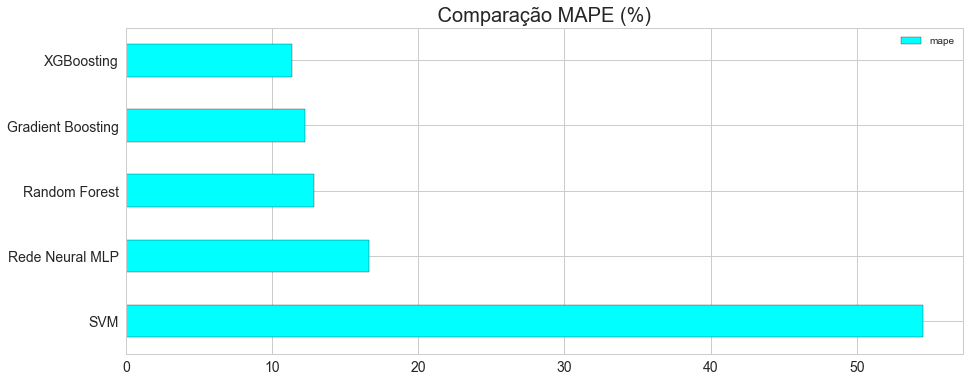

In [36]:
rcParams['figure.figsize'] = 15, 6
plt.style.use('seaborn-whitegrid')

# COMPARAÇÃO MAPE
modelos.sort_values('mape', ascending = False).plot(x = 'model', y = 'mape', kind = 'barh', 
                                                    color = 'cyan', edgecolor = 'black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel(''); plt.xticks(size = 14)
plt.title(' Comparação MAPE (%) ', size = 20);

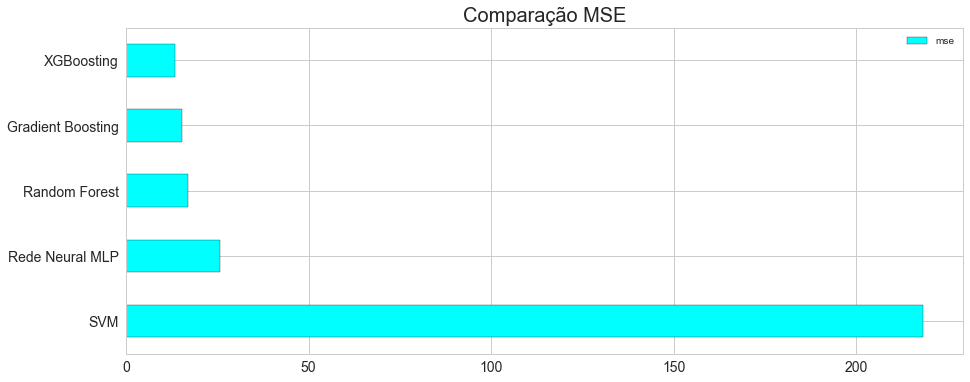

In [37]:
rcParams['figure.figsize'] = 15, 6
plt.style.use('seaborn-whitegrid')

modelos.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh', 
                                                    color = 'cyan', edgecolor = 'black')
# AXES
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel(''); plt.xticks(size = 14)
plt.title('Comparação MSE', size = 20);

De acordo com o obsservado podemos dizer que o XGBoosting acabou apresentando um melhor resultado perante ao MAPE e MSE (métricas bastante consideradas em problemáticas similares), assim realizaremos o tuning do modelo utilizando o Grid/Random Search além de entender a tomada de decisão do modelo.

## Tuning do Melhor Modelo

### Random Search

O Random Search (RS) é um ótimo otimizador de hiperparâmetros, que funciona de forma semelhante ao grid search entretanto ao invés de testar todas as combinações com a vizinhança, o RS, ou busca aleatória, testa todas as combinações aleatórias dos hiperparâmetros, conforme um número de amostras especificado definido pelo usuário.

Sua principal vantagem em relação ao GS é que ao definirmos um número específico de amostras para cada hiperparâmetro do nosso modelo, conseguimos diminuir o tempo de processamento do algoritmo. Assim, para datasets com uma quantidade maior de dados pode ser uma ótima alternativa em relação ao Grid Search.

Assim, realizaremos o tuning dos hiperparâmetros adiante com o Random Search e adiante com o Grid Search encontraremos o melhor número de árvores dentro de um intervalo especificado.

• **max_depth**: determina a profundidade máxima da árvore.

• **subsample**: porcentagem de amostras da árvore (valor baixo pode gerar underfitting).

• **colsample_bytree**: porcentagem de recursos a serem usados pela árvore (valor alto pode levar excesso de ajustes).

• **gamma**: controla se determinado nó será dividido com base na redução esperada de perda após a divisão.



In [38]:
# MAX_DEPTH 
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# SUBSAMPLE 
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

## COLSAMPLE_BYTREE
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

## GAMA
gamma = [0, 1, 5]


# DICIONÁRIO XGB
xgb_parametros = {'max_depth': max_depth,
                  'subsample': subsample,
                  'colsample_bytree': colsample_bytree,
                  'gamma':gamma}

## CROSS VALIDATION DE 4 COM K=20 INTERAÇÕES
XGBtuning = RandomizedSearchCV(estimator=xgboost, param_distributions=xgb_parametros, cv=4, 
                            n_iter=20, scoring = 'neg_mean_absolute_error',
                            n_jobs = -1, verbose = 1, 
                            return_train_score = True, random_state=42)

## FAZENDO O FIT DO TUNING
XGBtuning.fit(X_treino,Y_treino)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   14.0s finished


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [39]:
## MELHOR CONFIGURAÇÃO RANDOM SEARCH
model_tuning = XGBtuning.best_estimator_
print(XGBtuning.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


### Grid Search 

O Grid Search (GS), ou busca em grade, é um algoritmo criado com o objetivo principal de se realizar o tuning de nossos hiperparâmetros buscando a melhor configuração dentro de um conjunto de valores, testando todas as combinações dentro da vizinhança.

Ele exclusivamente tem a vantagem de ser utilizado em datasets menores, porém em dataframes que possuem uma grande quantidade de dados sua utilização pode não ser tão eficiente devido a necessidade de um grande tempo de processamento.

Esse intervalo foi escolhido devido ao mesmo ter apresentado uma melhor eficiência com diversos testes realizados com o Random Search.

In [40]:
## GRID
grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]}

## GS
grid_search_cv = GridSearchCV(model_tuning,
                              param_grid = grid,
                              verbose=1,cv=4) 

## GRID SEARCH
XGB_GS = grid_search_cv.fit(X_treino, Y_treino)

## MELHORES HIPERPARÂMETROS
BestXGB = XGB_GS.best_estimator_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  1.3min finished


In [41]:
data_dmatrix = xgb.DMatrix(data=Previsores,label=Target)

## Default
xgboost = xgb.XGBRegressor()
xgboost_default = xgboost.fit(X_treino,Y_treino)
predsXGB_default = xgboost_default.predict(X_teste)

## Tuning
xgboost_tuning = BestXGB.fit(X_treino,Y_treino)
predsXGB_tuning = xgboost_tuning.predict(X_teste)

In [42]:
print(BestXGB)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [43]:
# RESULTADOS
print("RESULTADOS DEFAULT")
print('MAPE Default (%):' , (mean_absolute_error(Y_teste[:], predsXGB_default[:]))/Y_teste[:].mean()*100)
print('MSE Default', mse(Y_teste, predsXGB_default))
print('\n')
print("RESULTADOS TUNING")
print('MAPE Tuning (%):' , (mean_absolute_error(Y_teste[:], predsXGB_tuning[:]))/Y_teste[:].mean()*100)
print('MSE Tuning', mse(Y_teste, predsXGB_tuning))

RESULTADOS DEFAULT
MAPE Default (%): 11.382986356881549
MSE Default 13.484200215054846


RESULTADOS TUNING
MAPE Tuning (%): 10.589344478212173
MSE Tuning 11.404242384505983


Possível observar uma breve melhora do modelo após o tuning utilizando o Random/Grid Search.

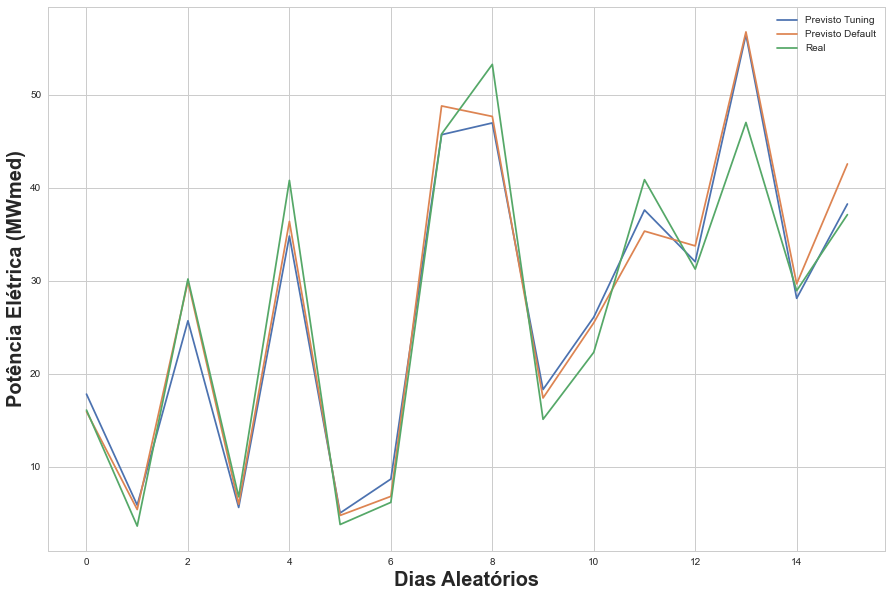

In [44]:
## OBSERVANDO PREVISÃO DO MODELO XGBOOSTING 14 DIAS ALEATÓRIOS
plt.style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = 15, 10

## DEFININDO TÍTULOS DOS EIXOS
#titulo = "XGBoosting - 15 Dias Aleatórios"
eixox = "Dias Aleatórios"
eixoy = "Potência Elétrica (MWmed)"

## ARMAZENANDO EM DEFININDO TAMANHO DA FONTE
#plt.title(titulo,fontsize=20,fontweight='bold')
plt.xlabel(eixox,fontsize=20,fontweight='bold')
plt.ylabel(eixoy,fontsize=20,fontweight='bold')

## CRIANDO UM VETOR DE 15 AMOSTRAS
eixo_x = np.arange(start=0, stop=16, step=1)

## PLOTANDO 14 DIAS ALEATÓRIOS
sns.lineplot(eixo_x,predsXGB_tuning[1:17], label = "Previsto Tuning")
sns.lineplot(eixo_x,predsXGB_default[1:17], label = "Previsto Default")
sns.lineplot(eixo_x,Y_teste[1:17], label = "Real")

## XGBoosting
#plt.savefig("XGBoosting_tuning.png", dpi = 300, bbox_inches='tight')

## MOSTRANDO LEGENDA (PREVISTO E REAL)
plt.legend()

Observando uma amostra de 15 dias aleatórios é evidente observar que o modelo se apresenta com uma alta precisão em determinados dias, entretanto em alguns dias onde há uma mudança mais brusca de geração de potência acaba não possuindo uma precisão tão alta.

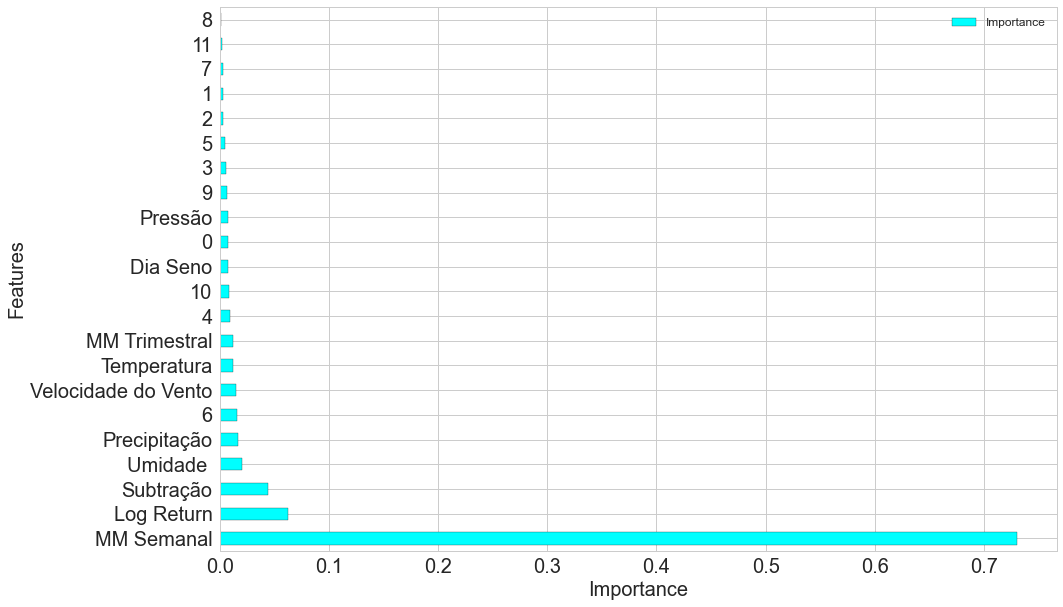

In [45]:
## TAMANHO DA FIGURA
plt.style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = 15, 10

# CRIANDO LISTA DOS PREVISORES E A UTILIZANDO FEATURE IMPORTANCE PARA OBSERVAR A TOMADA DE DECISÃO
feature_results = pd.DataFrame({'feature': list(Previsores.columns),'Importance': xgboost_tuning.feature_importances_})

## MOSTRANDO AS FEATURES RELEVANTES EM ORDEM
feature_results = feature_results.sort_values('Importance', ascending = False).reset_index(drop=True)

# PLOTANDO
feature_results.plot(x ='feature', y = 'Importance', edgecolor = 'k', kind='barh', color = 'cyan', fontsize=20);

## DEFININDO OS EIXOS COM A LISTA E FEATURE IMPORTANCE
plt.xlabel('Importance', size = 20); 
plt.ylabel('Features',size=20)
plt.legend(loc='best', fontsize=12)

## SALVANDO
#plt.savefig("XGBoosting_Feature_Importance.png", dpi = 300, bbox_inches='tight')

Fica evidente observar que dentre as features criadas na etapa de seleção de recursos que a Média Móvel semanal acabou possuindo um maior relevância global para a tomada de decisão do modelo já que a mesma permite seguir a "tendência" entre os últimos 7 dias gerados. Ademais, é possível observar que a Log Return e Subtração acabam por ter uma certa relevância global no modelo. 

No geral, podemos dizer que as variáveis criadas na etapa de feature engineering apresentaram uma relevância bem importante para a tomada de decisão do XGB.

Vale dizer que os resultados poderiam ser melhores se considerarmos que não estamos utilizando dados metereológicos exatamente do local onde se situa o parque eólico, mas sim da estação metereológica mais próxima disponivel pelo site do INMET. Além disso, é válido dizer que caso estivessemos realizando uma previsão horária com dados sem ruídos certamente a velocidade do vento seria a feature mais importante e com maior impacto para a previsão da geração de potência no Parque Eólico.

In [46]:
## SALVANDO MODELO TUNADO
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(xgboost_tuning, file)

## Conclusão

## O que foi realizado ?

• Foi construída uma base de dados brasileira composta por dados de potência elétrica gerada do Parque Eólico de Praia Formosa (CE) disponibilizados pelo Operador Nacional do Sistema (ONS) juntamente com dados metereológicos da região de Sobral (CE) a partir de dados do Instituto Nacional de Meteorologia (INMET).

• Realização da limpeza e adequação dos dados para a etapa análise exploratória de dados e aplicação dos modelos de Aprendizado de Máquina (AM).

• Aplicação de uma análise exploratória de dados (AED) com o objetivo de se identificar padrões e tendências entre os dados disponíveis, além de explorar o comportamento da variável target.

• Engenharia de Seleção de Recursos (Feature Engineering), onde foram criadas novas features para se colaborar na previsão a partir dos resultados observados na AED e levando em conta a problemática.

• Utilização de Machine Learning (Random Forest) para preenchimento de missing values.

• Análise de multicolinearidade entre as variáveis previsoras.

• Implementação computacional das seguintes metodologias de Aprendizado de Máquina: Random Forest Regressor (RF), Gradient Boosting Regressor (GB), Extreme Gradient Boosting Regressor (XGB), Support Vector Machines (SVM) e Rede Neural (MLP).

• Tuning do modelo ao qual apresentou o melhor desempenho com os hiperparâmetros no default.


## Resultados Obtidos

• O modelo que apresentou o melhor desempenho foi o XGBoosting com um MAPE de 10,598% após a etapa de tuning.

• Essa assertividade foi possível devido a etapa de Engenharia de Seleção de Recursos (Feature Engineering), onde foi possível criar variáveis compostas que colaboraram bastante no contexto preditivo, tais como: MM Semanal, Subtração Móvel (2 em 2 amostras) e Retorno Logarítmico.

• Uso do Feature Importance para observar as variáveis que mais influenciaram na tomada de decisão do XGB e ter a certeza de que realmente os resultados fizeram sentido.

## Próximos Passos

• Testar outros modelos de AM como o Adaboost.

• Criação de novas variáveis artificiais.

• Atualização da base de dados com dados de 2021.

• Combinação de Ensembles.

• Deploy do modelo utilizando a Streamlit


## Apoio

Essa pesquisa foi apoiada por: 

FAPESP - nº 2018/05341-4.